# 부스팅(Boosting)

In [1]:
from sklearn.datasets import load_wine
wine = load_wine()

In [2]:
import pandas as pd
df = pd.DataFrame(wine.data, columns=wine.feature_names)
print(df.shape)
df.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
import numpy as np
np.unique(wine.target, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48]))

In [4]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, stratify=wine.target, test_size=0.2, random_state=2022
)

### 1. XGBoost(eXtra Gradient Boost)
- PC에 설치
<pre>
conda activate base
conda install -c anaconda py-xgboost
</pre>

In [6]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=2022)
xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 2022,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [7]:
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_xgb)

0.9722222222222222

- 시각화

In [20]:
from xgboost import plot_importance as xgb_plot_importance
import matplotlib.pyplot as plt

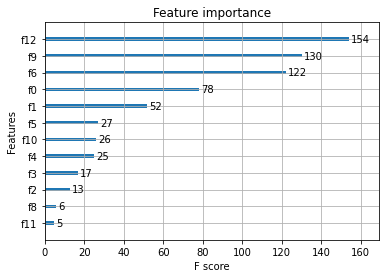

In [21]:
xgb_plot_importance(xgb)
plt.show()

- GridSearchCV

In [11]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [3,4,5,6]}
grid_xgb = GridSearchCV(xgb, params, scoring='accuracy', cv=5)
grid_xgb.fit(X_train, y_train)
grid_xgb.best_params_

{'max_depth': 4}

In [12]:
grid_xgb.best_estimator_.score(X_test, y_test)

0.9722222222222222

### 2. LightGBM
- PC에 설치
<pre>
conda activate base
conda install -c conda-forge lightgbm
</pre>

In [13]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [14]:
evals = [(X_test, y_test)]
lgb.fit(X_train, y_train, eval_set=evals, eval_metric='logloss', verbose=True)

[1]	valid_0's multi_logloss: 0.990435	valid_0's multi_logloss: 0.990435
[2]	valid_0's multi_logloss: 0.908143	valid_0's multi_logloss: 0.908143
[3]	valid_0's multi_logloss: 0.837356	valid_0's multi_logloss: 0.837356
[4]	valid_0's multi_logloss: 0.764444	valid_0's multi_logloss: 0.764444
[5]	valid_0's multi_logloss: 0.704935	valid_0's multi_logloss: 0.704935
[6]	valid_0's multi_logloss: 0.64864	valid_0's multi_logloss: 0.64864
[7]	valid_0's multi_logloss: 0.600436	valid_0's multi_logloss: 0.600436
[8]	valid_0's multi_logloss: 0.552786	valid_0's multi_logloss: 0.552786
[9]	valid_0's multi_logloss: 0.517989	valid_0's multi_logloss: 0.517989
[10]	valid_0's multi_logloss: 0.480141	valid_0's multi_logloss: 0.480141
[11]	valid_0's multi_logloss: 0.451184	valid_0's multi_logloss: 0.451184
[12]	valid_0's multi_logloss: 0.418687	valid_0's multi_logloss: 0.418687
[13]	valid_0's multi_logloss: 0.391787	valid_0's multi_logloss: 0.391787
[14]	valid_0's multi_logloss: 0.367788	valid_0's multi_logloss

LGBMClassifier()

In [15]:
pred_lgb = lgb.predict(X_test)
accuracy_score(y_test, pred_lgb)

0.9444444444444444

- 시각화

In [16]:
from lightgbm import plot_metric, plot_importance, plot_tree

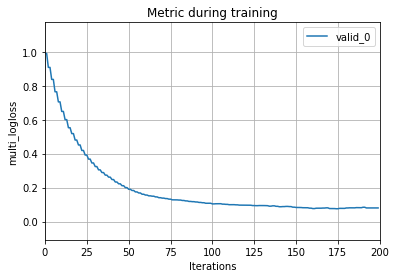

In [18]:
plot_metric(lgb);

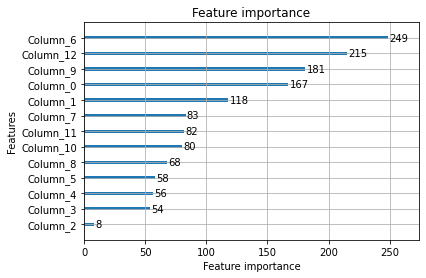

In [19]:
plot_importance(lgb);

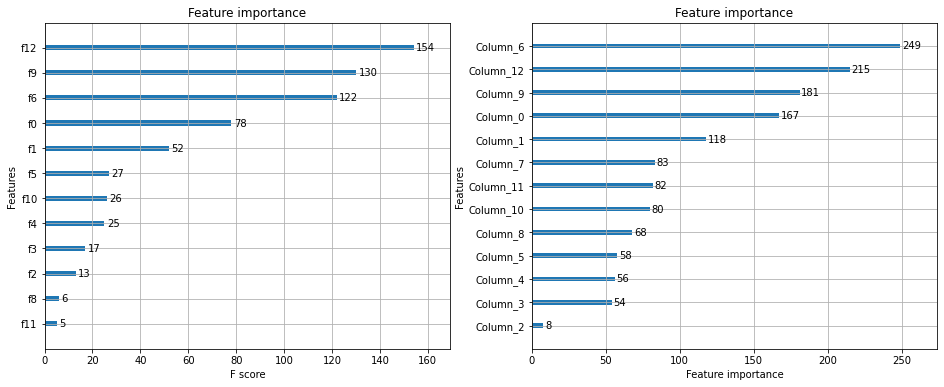

In [26]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
xgb_plot_importance(xgb, ax=ax[0])
plot_importance(lgb, ax=ax[1])
plt.show()

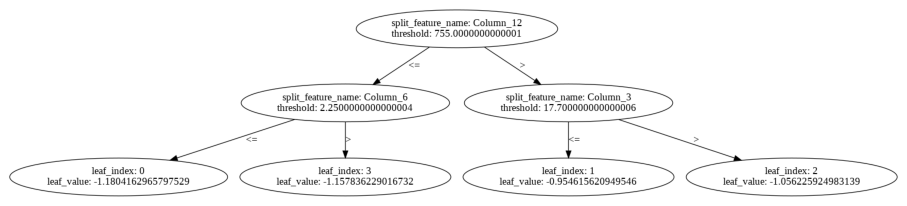

In [28]:
plot_tree(lgb, figsize=(16,12));